In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [2]:
df = pd.DataFrame(columns=['A', 'B', 'C'])

for col in df.columns:
    df[col] = np.random.lognormal(size=200000)

df['D'] = df['A'] * df['B']

df.head()

,A,B,C,D
0,0.319967,0.373342,0.938637,0.119457
1,0.391894,0.217598,0.830727,0.085275
2,1.390428,0.120798,5.387481,0.167961
3,2.103528,0.151513,0.363653,0.318713
4,9.202746,3.477367,3.527032,32.001327


## Taking the log, plotting the results

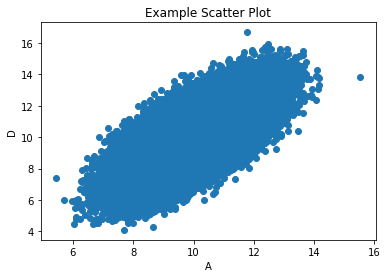

In [3]:
# Try out square rooting D

df_mod = np.log(df) + 10
#df_mod['D'] = np.sqrt(df_mod['D']) * 10

plt.scatter(df_mod['A'], df_mod['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('Example Scatter Plot')
plt.show()

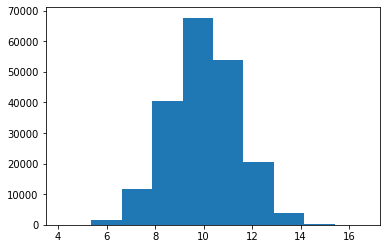

In [4]:
plt.hist(df_mod['D'])
plt.show()

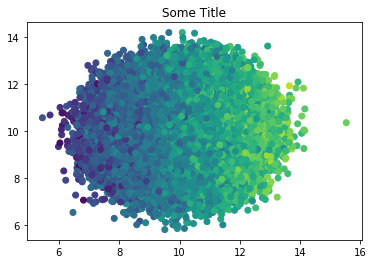

In [5]:
plt.scatter(df_mod['A'], df_mod['C'], c=df_mod['D'])
plt.title('Some Title')
plt.show()